In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
meta_data = pd.read_csv('../input/training_set_metadata.csv')

In [3]:
meta_data.size

94176

In [4]:
meta_data.describe()

object_id           ra         decl        gal_l        gal_b  \
count  7.848000e+03  7848.000000  7848.000000  7848.000000  7848.000000   
mean   4.810375e+07   169.719379   -27.254846   230.466784   -20.115526   
std    4.347364e+07   114.212761    20.248556    97.416392    40.390899   
min    6.150000e+02     0.175781   -64.760857     0.107681   -89.615573   
25%    3.180865e+05    62.402344   -44.597992   207.248509   -54.509752   
50%    4.131719e+07   150.996094   -27.279613   244.127187   -30.217582   
75%    8.665901e+07   282.875976    -8.838267   313.224277    16.913859   
max    1.307798e+08   359.824219     4.181528   359.943827    65.931317   

               ddf  hostgal_specz  hostgal_photoz  hostgal_photoz_err  \
count  7848.000000    7848.000000     7848.000000         7848.000000   
mean      0.269623       0.254436        0.357885            0.155695   
std       0.443792       0.330053        0.545552            0.300367   
min       0.000000       0.000000        0.000000            0.000000   
25%       0.000000       0.000000        0.000000            0.000000   
50%       0.000000       0.182750        0.210300            0.018000   
75%       1.000000       0.350125        0.431200            0.122375   
max       1.000000       3.445100        2.999400            1.734800   

           distmod        mwebv       target  
count  5523.000000  7848.000000  7848.000000  
mean     41.263961     0.081953    60.895387  
std       2.262711     0.150598    28.767984  
min      31.996100     0.003000     6.000000  
25%      39.845250     0.018000    42.000000  
50%      41.167900     0.032000    65.000000  
75%      42.398550     0.076000    90.000000  
max      47.025600     2.747000    95.000000

In [5]:
meta_data.describe(include='all')

object_id           ra         decl        gal_l        gal_b  \
count  7.848000e+03  7848.000000  7848.000000  7848.000000  7848.000000   
mean   4.810375e+07   169.719379   -27.254846   230.466784   -20.115526   
std    4.347364e+07   114.212761    20.248556    97.416392    40.390899   
min    6.150000e+02     0.175781   -64.760857     0.107681   -89.615573   
25%    3.180865e+05    62.402344   -44.597992   207.248509   -54.509752   
50%    4.131719e+07   150.996094   -27.279613   244.127187   -30.217582   
75%    8.665901e+07   282.875976    -8.838267   313.224277    16.913859   
max    1.307798e+08   359.824219     4.181528   359.943827    65.931317   

               ddf  hostgal_specz  hostgal_photoz  hostgal_photoz_err  \
count  7848.000000    7848.000000     7848.000000         7848.000000   
mean      0.269623       0.254436        0.357885            0.155695   
std       0.443792       0.330053        0.545552            0.300367   
min       0.000000       0.000000        0.000000            0.000000   
25%       0.000000       0.000000        0.000000            0.000000   
50%       0.000000       0.182750        0.210300            0.018000   
75%       1.000000       0.350125        0.431200            0.122375   
max       1.000000       3.445100        2.999400            1.734800   

           distmod        mwebv       target  
count  5523.000000  7848.000000  7848.000000  
mean     41.263961     0.081953    60.895387  
std       2.262711     0.150598    28.767984  
min      31.996100     0.003000     6.000000  
25%      39.845250     0.018000    42.000000  
50%      41.167900     0.032000    65.000000  
75%      42.398550     0.076000    90.000000  
max      47.025600     2.747000    95.000000

In [6]:
sorted(meta_data.target.unique())

[6, 15, 16, 42, 52, 53, 62, 64, 65, 67, 88, 90, 92, 95]

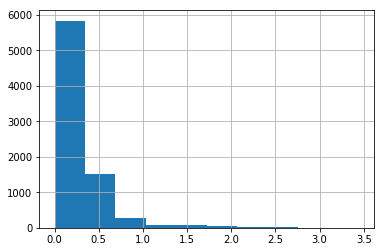

In [7]:
meta_data.hostgal_specz.hist()

In [8]:
(meta_data.hostgal_specz == 0).mean()

0.2962538226299694

In [9]:
galactic_cut = meta_data.hostgal_specz == 0

In [10]:
meta_data[galactic_cut].target.unique()

array([92, 65, 16,  6, 53])

In [11]:
meta_data[galactic_cut].target.value_counts()

65    981
16    924
92    239
6     151
53     30
Name: target, dtype: int64

In [12]:
meta_data[~galactic_cut].target.unique()

array([88, 42, 90, 67, 95, 62, 15, 52, 64])

In [13]:
meta_data[~galactic_cut].target.value_counts()

90    2313
42    1193
15     495
62     484
88     370
67     208
52     183
95     175
64     102
Name: target, dtype: int64

In [14]:
meta_data.ddf.value_counts()

0    5732
1    2116
Name: ddf, dtype: int64

In [15]:
meta_data[meta_data.ddf == 0].target.value_counts()

90    1476
42     889
16     762
65     672
15     487
62     355
88     251
92     181
6      144
67     142
95     134
52     113
64     100
53      26
Name: target, dtype: int64

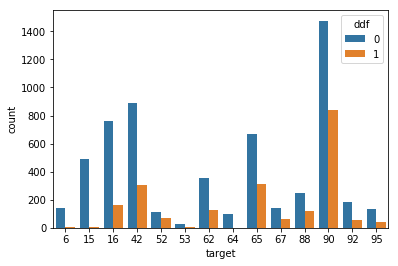

In [16]:
sns.countplot(x='target', hue='ddf', data=meta_data)

In [2]:
test_meta_data = pd.read_csv('../input/test_set_metadata.csv')

In [18]:
test_meta_data.describe()

object_id            ra          decl         gal_l         gal_b  \
count  3.492890e+06  3.492890e+06  3.492890e+06  3.492890e+06  3.492890e+06   
mean   6.528181e+07  1.705897e+02 -2.624964e+01  2.178545e+02 -1.843280e+01   
std    3.783131e+07  1.092068e+02  1.764381e+01  1.081992e+02  3.958926e+01   
min    1.300000e+01  0.000000e+00 -6.476086e+01  1.036900e-02 -8.967441e+01   
25%    3.252507e+07  7.277344e+01 -4.042390e+01  1.733004e+02 -5.280274e+01   
50%    6.530507e+07  1.611914e+02 -2.511770e+01  2.459314e+02 -2.448392e+01   
75%    9.805302e+07  2.758614e+02 -1.126298e+01  2.983127e+02  1.726843e+01   
max    1.307881e+08  3.598242e+02  4.181528e+00  3.599956e+02  6.606870e+01   

                ddf  hostgal_specz  hostgal_photoz  hostgal_photoz_err  \
count  3.492890e+06  120393.000000    3.492890e+06        3.492890e+06   
mean   9.426578e-03       0.305988    5.168159e-01        1.535211e-01   
std    9.663188e-02       0.159928    4.491342e-01        2.752581e-01   
min    0.000000e+00       0.007700    0.000000e+00        0.000000e+00   
25%    0.000000e+00       0.192600    2.683000e-01        1.380000e-02   
50%    0.000000e+00       0.295800    4.619000e-01        3.030000e-02   
75%    0.000000e+00       0.406000    6.557000e-01        1.432000e-01   
max    1.000000e+00       1.201400    3.000000e+00        1.871400e+00   

            distmod         mwebv  
count  3.102380e+06  3.492890e+06  
mean   4.217862e+01  9.196644e-02  
std    1.587242e+00  1.551435e-01  
min    2.764620e+01  2.000000e-03  
25%    4.124470e+01  2.300000e-02  
50%    4.227200e+01  4.500000e-02  
75%    4.308390e+01  9.100000e-02  
max    4.702610e+01  2.994000e+00

In [19]:
(test_meta_data.hostgal_photoz == 0).mean()

0.1118014022771974

In [3]:
test_meta_data.object_id.unique().shape

(3492890,)

In [4]:
3492890 * 20 / 3600

19404.944444444445